# 다루는 내용
- 일반적인 디자인 패턴
- 파이썬에서는 유용하지 않은 디자인 패턴 & 대안
- 파이썬스러운 구현
- 훌륭한 추상화의 중요성

# 0. 디자인패턴
- 디자인 패턴은 [아키텍처 설계 수준](https://mingrammer.com/translation-10-common-software-architectural-patterns-in-a-nutshell/) 보다 낮은 설계 문제에 재사용 가능한 솔루션을 제공함
- "당신은 동네 서점에 사용될 도서 관리/판매 시스템의 외주를 받았다. 아래 요구 사항 분석을 확인해보자"
- 요구 사항 분석 : `시스템은 자료를 갱신하기 위한 제어부분과 함께 재고 data를 표시해야한다.`
- 대화형 시스템 + MVC 패턴이 가장 적합함. 
- 뷰에 모델의 가장 최근 변경 사항이 반영되도록 하는 방법을 생각하다 보면, 자연스레 하위 디자인 수준의 문제에 접하게 됨. 


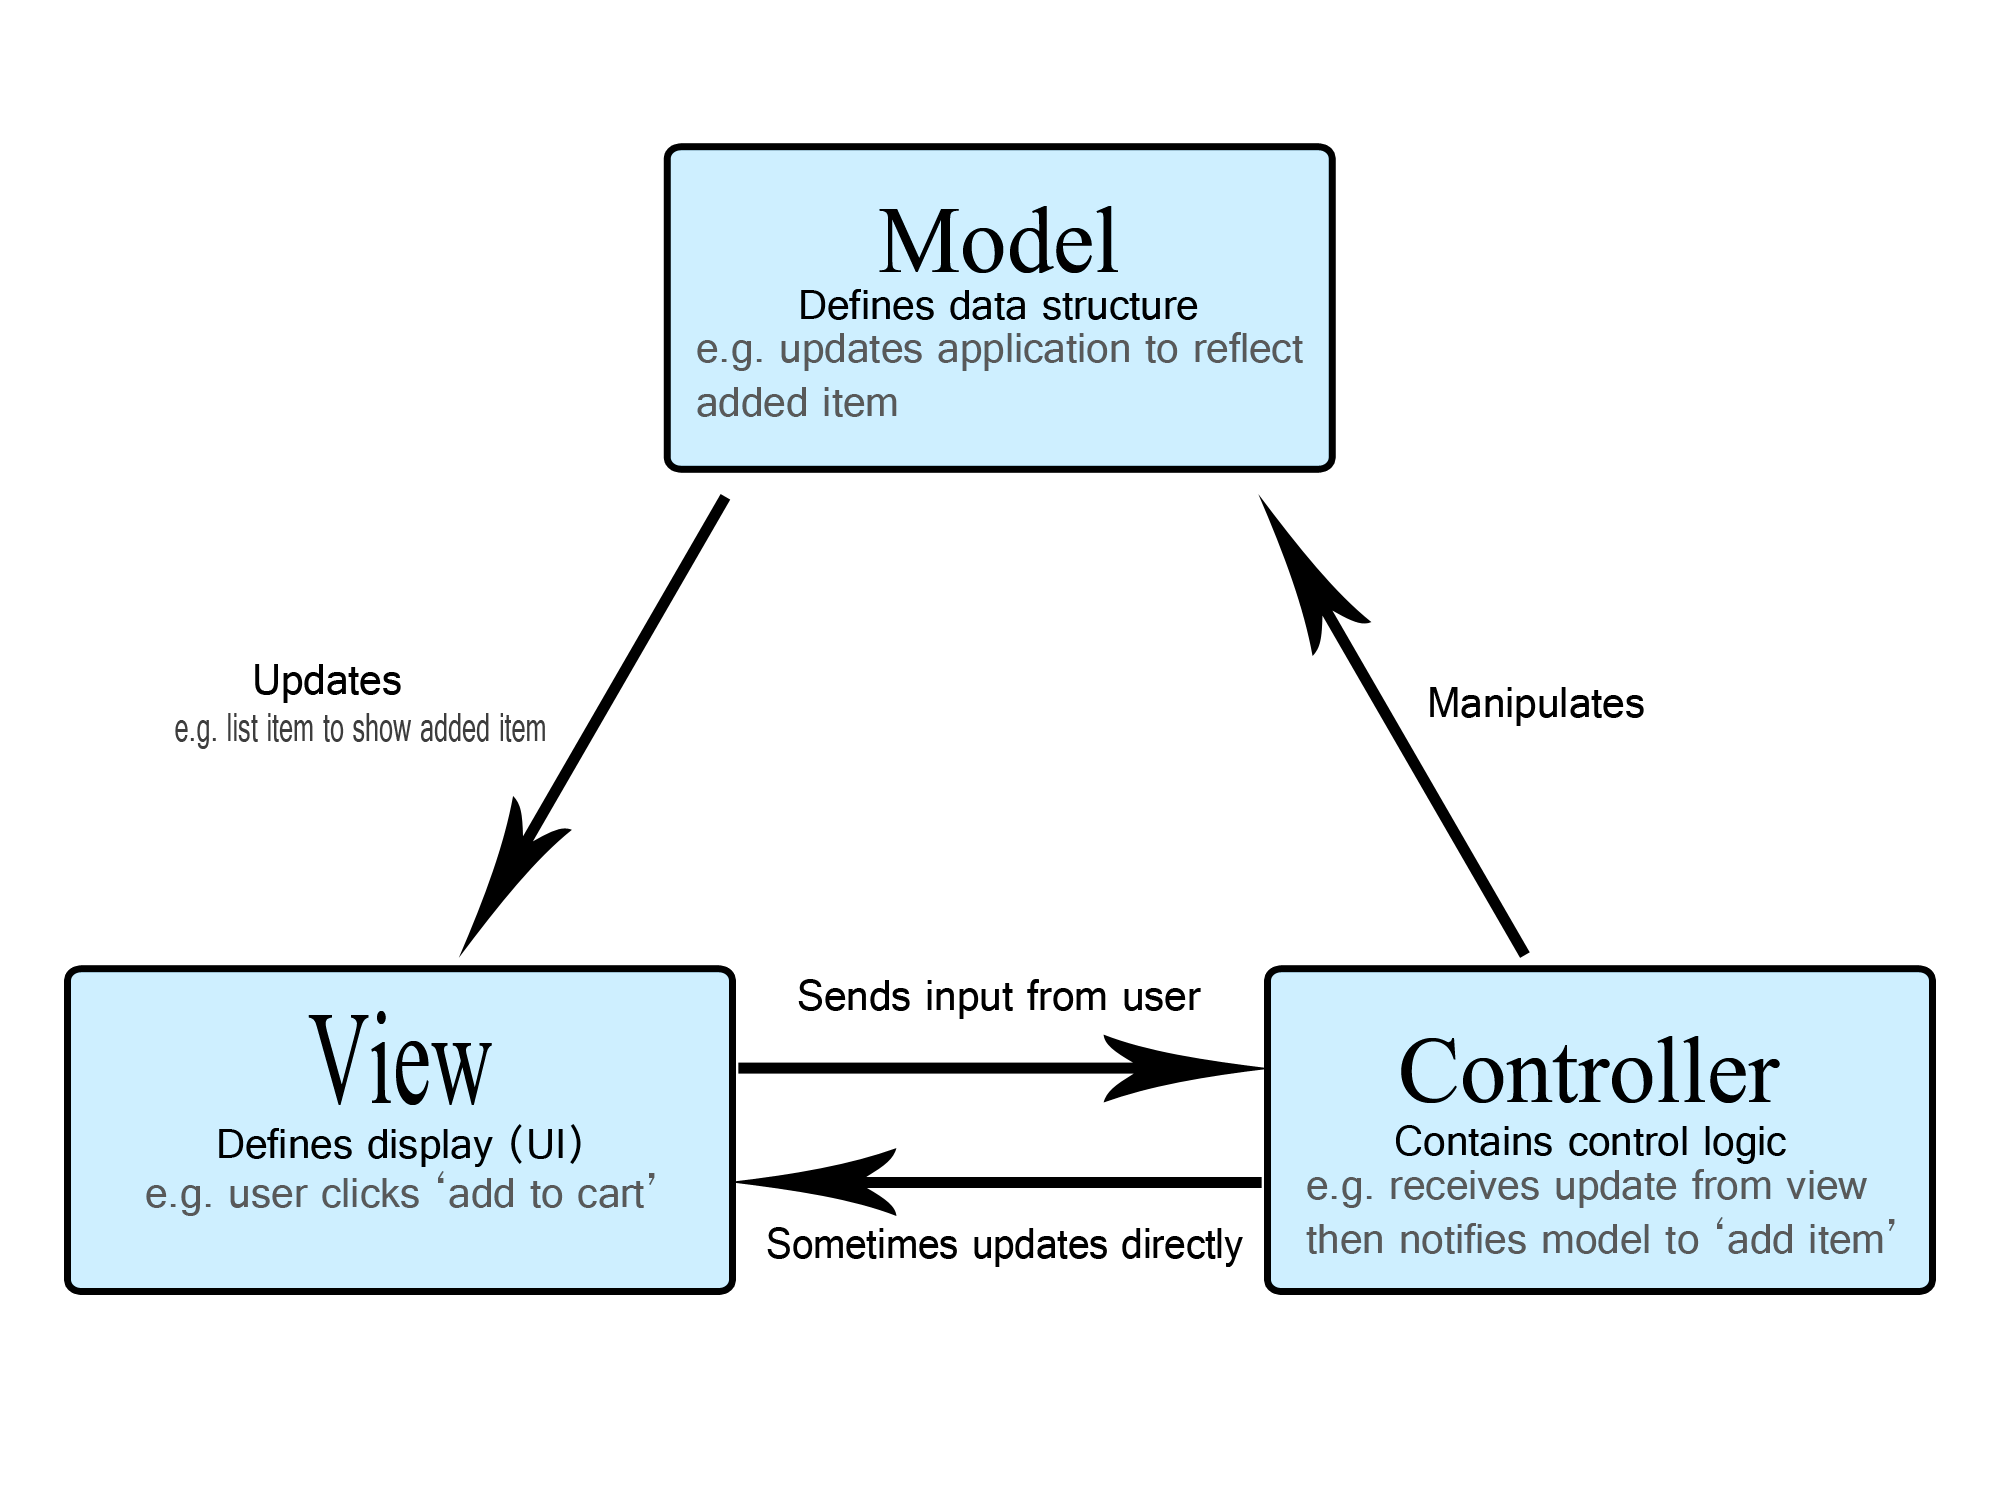

- 즉, 데이터를 가진 모델과 이를 이용하는 뷰의 효과적인 설계 솔루션 모델을 찾게 되는데, 이것이 디자인 패턴이 적용되는 수준임.
- 결론적으로 디자인 패턴이 적용되는 수준은 요구사항을 고려하여 아키텍처를 확정한 후, <br>
  아키텍처의 컴포넌트들을 구현하는 class의 역할과 동작이 결정된 후 발생하는 설계 이슈에 대하여 <br>
  솔루션으로 적합한 디자인 패턴을 적용하고, 이를 단계적으로 진화/개선시킴
- 책을 읽다보면 '어라? 당연히 그렇게 해야하는 게 아닌가?' 라고 생각이 드는 것이 맞음.

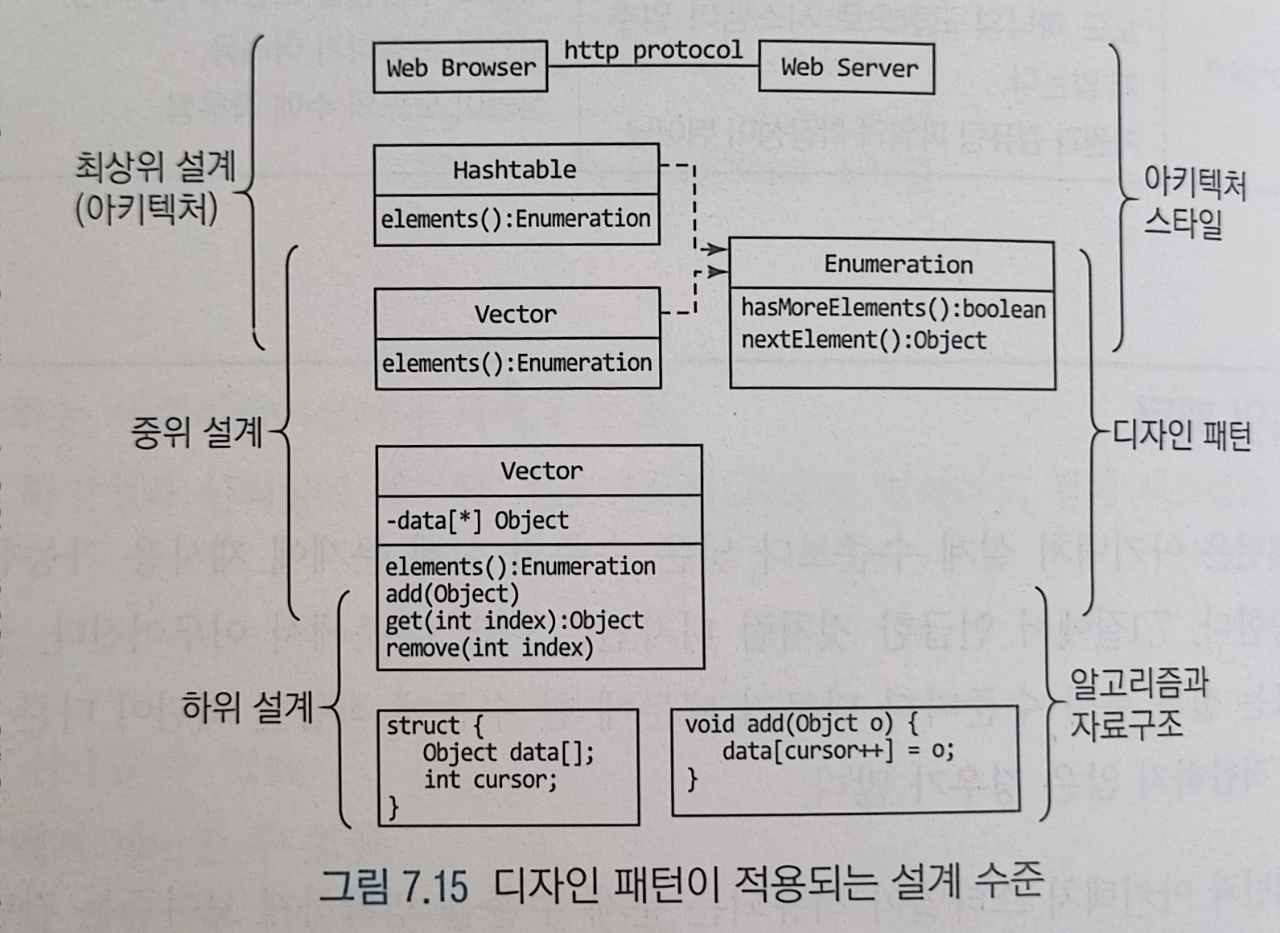

# 1. 파이썬 디자인패턴 적용 시 고려 사항
- 객체 지향 디자인 패턴은 특정 언어에만 종속된 것은 아님!
- 하지만 파이썬의 특성을 고려한 디자인 패턴 사용이 필요! 
- 이미 파이썬 자체에서 디자인 패턴을 지원 (Ex. 이터레이터, 생성패턴 등)

# 2. 실전 속의 디자인 패턴
- Gang of Four에서 소개하고 있는 [23개의 디자인 패턴](https://4z7l.github.io/2020/12/25/design_pattern_GoF.html)이 기준.
- 각 패턴은 생성(Creational), 구조(Structural), 행동(Behavioral) 패턴 중의 하나로 분류됨.

## 2.1.1 주목할 만한 점
- 일부 패턴은 파이썬 내부에서 자체적으로 구현되어있음. <br>
  (숨겨져 있음 -> 이터레이터 패턴, os모듈의 FACADE 패턴)
- 패턴은 '패턴'일 뿐 일반적이진 않다.(특정한 상황에서만 사용되는 패턴도 있음)

## 2.1.2 디자인패턴의 "출현"  
- 애플리케이션의 솔루션에 강제로 패턴을 적용시키는 것이 아니라, <br>
코드에 반복적으로 같은 내용이 출현 할 때 일반적이고 추상화된 클레스, 컴포넌트의 패턴이 "발견" 되는 것!

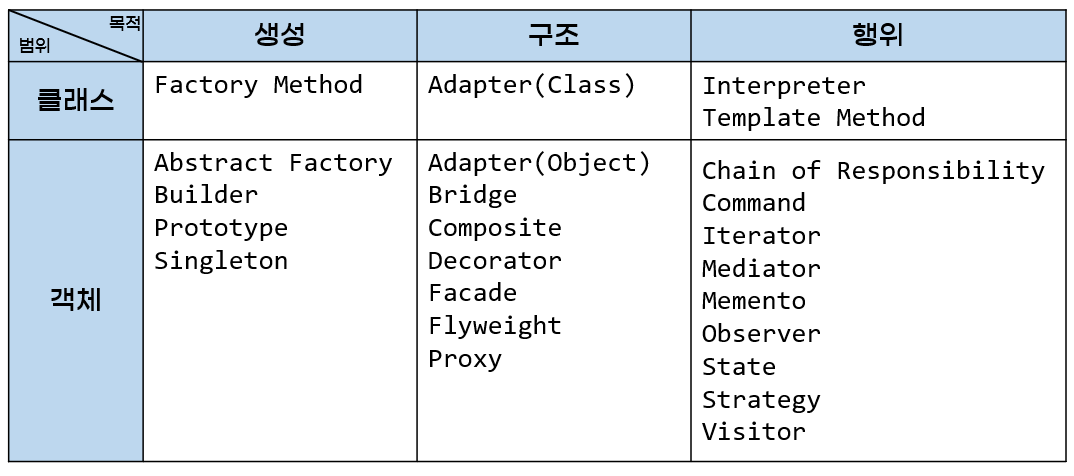

## 2.2 생성(Creational) 패턴
- 객체를 인스턴스화(생성) 할 때, 복잡성을 추상화하기 위해 필요. 
- 객체 초기화를 위한 파라미터를 결정하거나 초기화에 필요한 객체를 준비 
- 본 책에서는 생성 패턴 중 "Singleton" 패턴에 대해 다루며 파이썬에서 가장 많이 사용된다는 "Borg" 패턴도 다룸.

### 2.2.1 팩토리 패턴
- 파이썬의 핵심 기능 중 하나는 "모든 것이 객체라는 것"
- 즉 클래스, 함수 등 각각의 역할이 구분되어 있진 않다. 
- 따라서 파이썬에서는 팩토리 패턴이 필요하지 않다. 

### 2.2.2 팩토리 패턴이 뭔데?
- 팩토리 패턴 : 객체를 생성하는 인터페이스는 미리 정의하되, 인스턴스를 만들 클래스의 결정은 서브 클래스 쪽에서 내리는 패턴
- 다시 말해, 여러 개의 서브 클래스를 가진 슈퍼 클래스가 있을 때 인풋에 따라 하나의 자식 클래스의 인스턴스를 리턴해주는 방식
- 팩토리 패턴은 클라이언트에서 사용할 클래스의 객체를 생성하는 책임을 분리하여 객체 생성의 변화를 대비하려는 문제를 해결하고자 함. <br>


#### JAVA Factory pattern Example 
- Superclass(Computer)
```java
public abstract class Computer {
	
    public abstract String getRAM();
    public abstract String getHDD();
    public abstract String getCPU();
	
    @Override
    public String toString(){
        return "RAM= "+this.getRAM()+", HDD="+this.getHDD()+", CPU="+this.getCPU();
    }
}
```

- Subclass(PC)
```java
public class PC extends Computer {
 
    private String ram;
    private String hdd;
    private String cpu;
	
    public PC(String ram, String hdd, String cpu){
        this.ram=ram;
        this.hdd=hdd;
        this.cpu=cpu;
    }
    @Override
    public String getRAM() {
        return this.ram;
    }
 
    @Override
    public String getHDD() {
    return this.hdd;
    }
 
    @Override
    public String getCPU() {
        return this.cpu;
    }
}
```


- Subclass(Server)
```java
public class Server extends Computer {
 
    private String ram;
    private String hdd;
    private String cpu;
	
    public Server(String ram, String hdd, String cpu){
        this.ram=ram;
        this.hdd=hdd;
        this.cpu=cpu;
    }
    @Override
    public String getRAM() {
        return this.ram;
    }
 
    @Override
    public String getHDD() {
        return this.hdd;
    }
 
    @Override
    public String getCPU() {
        return this.cpu;
    }
}
```

- Factory class 
```java
public class ComputerFactory {
 
    public static Computer getComputer(String type, String ram, String hdd, String cpu){
        if("PC".equalsIgnoreCase(type))
            return new PC(ram, hdd, cpu);
        else if("Server".equalsIgnoreCase(type))
            return new Server(ram, hdd, cpu);
		
        return null;
    }
}
```

- ComputerFactory 클래스의 getComputer 메소드를 살펴보면 static 메소드로 구현되었다는 점을 살펴볼 수 있고, 
- 메소드 내부 코드를 보면 type의 값이 "PC"일 경우 PC 클래스의 인스턴스를, "Server"일 경우 Server 클래스의 인스턴스를 리턴하는 것을 볼 수 있음.
- 이렇듯 팩토리 패턴을 사용하게 된다면 인스턴스를 필요로 하는 Application에서 Computer의 Sub 클래스에 대한 정보는 모른 채 인스턴스를 생성할 수 있음(추상화)

- 앞으로 Computer 클래스에 더 많은 Sub 클래스가 추가된다 할지라도 getComputer()를 통해 인스턴스를 제공받던 Application의 코드는 수정할 필요가 없음.
<br>
----------------------------------------------
- 파이썬 사용 시 다른 클래스를 인스턴스화하기 위해 다른 클래스에 위임할 필요가 없음.<br>
    =>  정수나 문자열을 전달하는 것과 똑같은 방식으로 클래스 객체를 직접 전달가능 
https://stackoverflow.com/questions/3511027/factory-pattern-in-python

### 2.2.3 Singleton 패턴



- 팩토리 패턴의 대안으로 Singleton도 있는데, Singleton은 전역 변수의 한 형태를 사용하기 때문에 Bad! + 단위 테스트가 어렵다. 
- 가능하면 Singleton 사용하지 말자. 필요하다면 모듈을 사용하자!
- 모듈에 객체를 생성할 수 있으며, 모듈을 import한 모든 곳에서 사용할 수 있음. -> 파이썬 모듈은 이미 singleton이라고 할 수 있음.
- 즉, 여러 번 import 하더라도 sys.modules에 로딩되는 것은 항상 한 개임.

### 2.2.4 Singleton이 뭐야?
- 싱글톤 패턴은 어떤 클래스의 인스턴스가 오직 하나임을 보장하며, 이 인스턴스에 접근할 수 있는 전역적인 접촉점을 제공하는 패턴
- 프로그램 시작부터 종료 시까지 어떤 클래스의 인스턴스가 메모리 상에 단 하나만 존재할 수 있게 하고 이 인스턴스에 대해 어디에서나 접근할 수 있도록 하는 패턴
- 로그를 찍는(Logging) 객체라던가 쓰레드 풀, 윈도우 관리자 등 여러 객체를 관리하는 역할의 객체는 프로그램 내에서 단 하나의 인스턴스를 갖는 것이 바람직함.
- 클래스 자신이 자기의 유일한 인스턴스로 접근하는 방법을 자체적으로 관리하는 것. 
- 결국 하나의 클래스 인스턴스만 원하고 모든 클라이언트가 동일한 인스턴스를 공유하려면 Singleton 패턴을 사용.

```java
public class Singleton {
    
    private static final Singleton instance = new Singleton();
    
    // private constructor to avoid client applications to use constructor
    private Singleton(){}
 
    public static Singleton getInstance(){
        return instance;
    }
}

```

[요약 : 모듈을 사용하자](https://stackoverflow.com/questions/6760685/creating-a-singleton-in-python)

### 2.2.5 공유 상태(monostate)
- 객체가 어떻게 호출, 생성, 초기화되는지 상관 없이 하나의 인스턴스를 갖는 Singleton을 사용하는 것 보다, <br>
  여러 인스턴스에서 사용할 수 있도록 데이터를 복제하는 것이 좋음.

- 이러한 방법은 정보를 투명한 방법으로 동기화하기 때문에 사용하기 편할 뿐 아니라 에러가 발생할 가능성이 적음.


- Github에서 최신 tag의 코드를 가져오는 객체가 있다고 가정해보자. 

In [3]:
#Case 1. 데코레이터를 사용한 Getter & Setter 구현
import logging

logging.basicConfig()
logger = logging.getLogger("test")
logger.setLevel(logging.DEBUG)

class GitFetcher:
    _current_tag = None

    def __init__(self, tag):
        self.current_tag = tag # 프로퍼티를 통해 클래스 변수와 연결되어 있음

    @property
    def current_tag(self):
        if self._current_tag is None:
            raise AttributeError("Tag is not initialized yet.")
        return self._current_tag 
    
    @current_tag.setter
    def current_tag(self, new_tag):
        self.__class__._current_tag = new_tag 
        
    def pull(self):
        logger.info("%s에서 Pull",self.current_tag)
        return self.current_tag

if __name__ == "__main__":
    f1 = GitFetcher(0.1)
    f2 = GitFetcher(0.2)
    f1.current_tag = 0.3
    
    f2.pull()

INFO:test:0.3에서 Pull


In [41]:
f1.pull() 
# 다른 버전을 가진 여러 GitFetcher 인스턴스를 만들어도 모두가 같은 (최신) 버전을 공유하고 있음.

INFO:test:0.3에서 Pull


0.3

In [3]:
#Case 2. Descriptor로 구현 
class SharedArrtibute:
    def __init__(self, initial_value=None):
        self.value = initial_value
        self._name = None
        
    def __get__(self, instance, owner):
        if instance is None:
            return self
        if self.value is None:
            raise AttributeError(f"{self._name} was never set")
        return self.value
    
    def __set__(self, instance, new_value):
        logger.info("calling __set__")
        self.value = new_value
        
    def __set_name__(self, owner, name):
        self._name = name
        
        
class GitFetcher:
    current_tag = SharedArrtibute()
    current_branch = SharedArrtibute() # branch에도 적용하고 싶으면, 클래스 속성 추가로 간편하게 적용가능!

    def __init__(self, tag, branch=None):
        self.current_tag = tag 

    def pull(self):
        logger.info("%s에서 Pull",self.current_tag)
        return self.current_tag
    
if __name__ == "__main__":
    f1 = GitFetcher(0.1)
    f2 = GitFetcher(0.2)
    f1.current_tag = 0.3
    
    f2.pull()

INFO:test:calling __set__
INFO:test:calling __set__
INFO:test:calling __set__
INFO:test:0.3에서 Pull


In [48]:
f1.pull()

INFO:test:0.3에서 Pull


0.3

### 2.2.6 borg 패턴
- 같은 클래스의 모든 인스턴스가 모든 속성을 복제하는 객체를 만듬.
- 다음 예제에서는 이전 예제의 객체를 두 가지로 나눔. 
1. tag에 기반을 두고 동작.
2. branch에 기반을 두고 동작.


In [25]:
class BaseFetcher:
    def __init__(self, source):
        self.source = source

        
class TagFetcher(BaseFetcher):
    _attributes = {} # borg 패턴의 특징, class attribute를 저장하는 dictionary.  객체에 선언한 변수들이 key,value로 들어감. 이때 key는 항상 "source"
    #https://stackoverflow.com/questions/12127925/why-is-this-python-borg-singleton-pattern-working
    
    def __init__(self, source):
        self.__dict__ = self.__class__._attributes # 속성을 저장한 dictionary를 참조
        print("1")
        print(self.__class__._attributes)
        print("2")
        super().__init__(source) 
        print(self.__class__._attributes) 
        print("3")
        
    def pull(self):
        logger.info(f"Pull at tag {self.source}")
        return f"Tag = {self.source}"
    

class BranchFetcher(BaseFetcher):
    _attributes = {} # dictionary는 레퍼런스 형태로 전달되는 변경 가능한 mutable 객체이므로
                     # dictionary를 업데이트하면 모든 객체에 동일하게 업데이트 됨
    
    def __init__(self, source):
        self.__dict__ = self.__class__._attributes # 속성을 저장한 dictionary를 참조
        super().__init__(source)
        
    def pull(self):
        logger.info(f"Pull at branch {self.source}")
        return f"Branch = {self.source}"    

In [23]:
f1 = TagFetcher(0.1)
print(f1.__dict__)
f2 = BranchFetcher(0.2)
print(f1._attributes)
print(f2._attributes)
f2.pull()

INFO:test:Pull at branch 0.2


1
{}
2
{'source': 0.1}
3
{'source': 0.1}
{'source': 0.1}
{'source': 0.2}


'Branch = 0.2'

In [14]:
f1.pull()

INFO:test:Pull at tag 0.1


'Tag = 0.1'

In [15]:
f3 = BranchFetcher(0.3)

In [16]:
print(f1._attributes)
print(f2._attributes)
f2.pull()

INFO:test:Pull at branch 0.3


{'source': 0.1}
{'source': 0.3}


'Branch = 0.3'

- 속성을 저장한 dictionary는 mutable 객체로서 어느 한 곳에서 업데이트를 하면 모든 객체에게 동일하게 업데이트됨.

In [37]:
# 믹스인 class를 만들어서 추상화한 예제 
# 믹스인 class 설명 https://two-parks.tistory.com/35

# 공통 부분 시작
class SharedAllMixin:
    def __init__(self, *args, **kwargs):
        try:
            self.__class__._attributes
        except AttributeError:
            self.__class__._attributes = {}

        self.__dict__ = self.__class__._attributes
        super().__init__(*args, **kwargs)


class BaseFetcher:
    def __init__(self, source):
        self.source = source
# 공통 부분 끝 

class TagFetcher(SharedAllMixin, BaseFetcher):
    def pull(self):
        logger.info("pulling from tag %s", self.source)
        return f"Tag = {self.source}"


class BranchFetcher(SharedAllMixin, BaseFetcher):
    def pull(self):
        logger.info("pulling from branch %s", self.source)
        return f"Branch = {self.source}"

    
if __name__ == "__main__":
    f1 = TagFetcher(0.1)
    f2 = TagFetcher(0.2)
    
    print(f2.__dict__)
    print(TagFetcher.mro())
    print(SharedAllMixin.__subclasses__())
    
    f2.pull()
    f1.pull()

INFO:test:pulling from tag 0.2
INFO:test:pulling from tag 0.2


{'source': 0.2}
[<class '__main__.TagFetcher'>, <class '__main__.SharedAllMixin'>, <class '__main__.BaseFetcher'>, <class 'object'>]
[<class '__main__.TagFetcher'>, <class '__main__.BranchFetcher'>]


### 2.3 구조(Strucural) 패턴
- 구조 패턴은 인터페이스를 복잡하게 하지 않으면서도 기능을 확장하여 더 강력한 인터페이스를 만들 때 유용함.
- 즉, 여러 개의 객체를 조합하거나 인터페이스를 조합하여 구현.

#### 2.3.1 어댑터 패턴
- wrapper라고도 하는 어댑터 패턴은 호환되지 않는 두 개 이상의 객체에 대한 인터페이스를 동시에 사용할 수 있게함.
- 예를 들어 fetch() method로 데이터를 가져오는 여러 객체가 있을 때, fetch() 인터페이스를 유지하면 클라이언트는 크게 코드를 바꿀 필요가 없음.
- 하지만 fetch() method를 갖고 있지 않은 새로운 데이터 소스를 추가하려고 할 때, 기존 인터페이스와 호환이 되지 않고 꽁꽁 숨겨져 있을 수도 있음(API로만 받아오는 경우) 
- 이런 상황에서 새로운 객체를 직접 사용하는 대신에, 해당 객체를 수용할 수 있는 새로운 인터페이스를 만들 수 있음.

1. 첫 번째 방법 : 사용하려는 class를 상속 받는 class를 만드는 것 

    - 상속을 통해 외부 class를 import하고 새로운 method를 갖는 class를 만든다음 해당 method를 호출.

In [24]:
# 상속받아야하는 class
class UsernameLookup:
    def search(self, user_namespace):
        logger.info("looking for %s", user_namespace)

In [42]:
# from _apdapter_base import UsernameLookup
class UserSource(UsernameLookup):
    def __init__(self, user_id, username):
        self.user_id = user_id
        self.username = username
        

    def fetch(self, user_id, username):
        user_namespace = self._adapt_arguments(user_id, username)
        return self.search(user_namespace)

    @staticmethod
    def _adapt_arguments(user_id, username):
        return f"{user_id}:{username}"

In [49]:
f1 = UserSource(1, "lsh")
f1.fetch(1, "lsh")


INFO:test:looking for 1:lsh


- 상속은 얼마나 많은 외부 라이브러리를 가져올지 정확히 알기 어려우므로 직접적인 is a 관계에 한정해서 적용하는 것이 바람직함
- 따라서 
    2. 두 번째 방법 : 컴포지션을 사용함.(객체에 UsernameLookup 인스턴스를 제공)

In [60]:
class UsernameLookup2:
    def __init__(self, user_id, username):
        self.user_id = user_id
        self.username = username
        
    def search(self, user_namespace):
        logger.info("looking for %s", user_namespace)

In [61]:
class UserSource2:
    def __init__(self, username_lookup: UsernameLookup2) -> None:
        self.username_lookup = username_lookup

    def fetch(self, user_id, username):
        user_namespace = self._adapt_arguments(user_id, username)
        return self.username_lookup.search(user_namespace)

    @staticmethod
    def _adapt_arguments(user_id, username):
        return f"{user_id}:{username}"

In [64]:
sample = UsernameLookup2(1, "lsh")

UserSource2(sample).fetch(1, "lsh")

INFO:test:looking for 1:lsh


#### 2.3.2 컴포지트(composite)
- 객체는 구조화된 트리 형태로 볼 수 있으며, 기본 객체는 리프 노드이고 컨테이너 객체는 중간 노드라 볼 수 있음
- 클라이언트는 이 중 아무거나 호출하여 결과를 얻으려고 할 것임
- 또한 컴포지트 객체도 클라이언트 처럼 동작함
- 즉 리프 노드인지 중간 노드인지 상관없이 해당 요청을 관련노드가 처리할 수 있을 때까지 계속 전달.

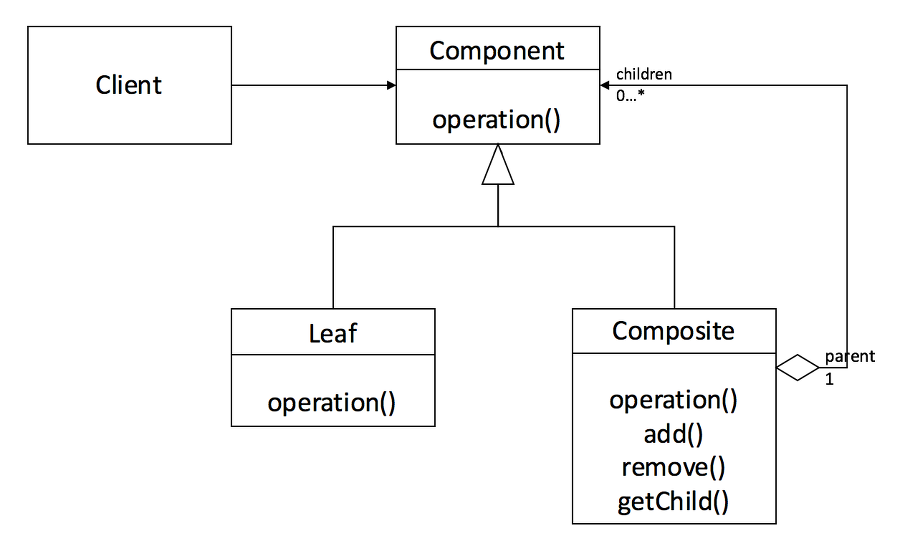

- "Client" 클래스는 "Leaf" 와 "Composite" 클래스를 직접 참조하지 않고, 공통 인터페이스 "Component" 를 참조하는 것을 볼 수 있다.

- "Leaf" 클래스는 "Component" 인터페이스를 구현한다.

- "Composite" 클래스는 "Component" 객체 자식들을 유지하고, operation() 과 같은 요청을 통해 자식들에게 전달한다.


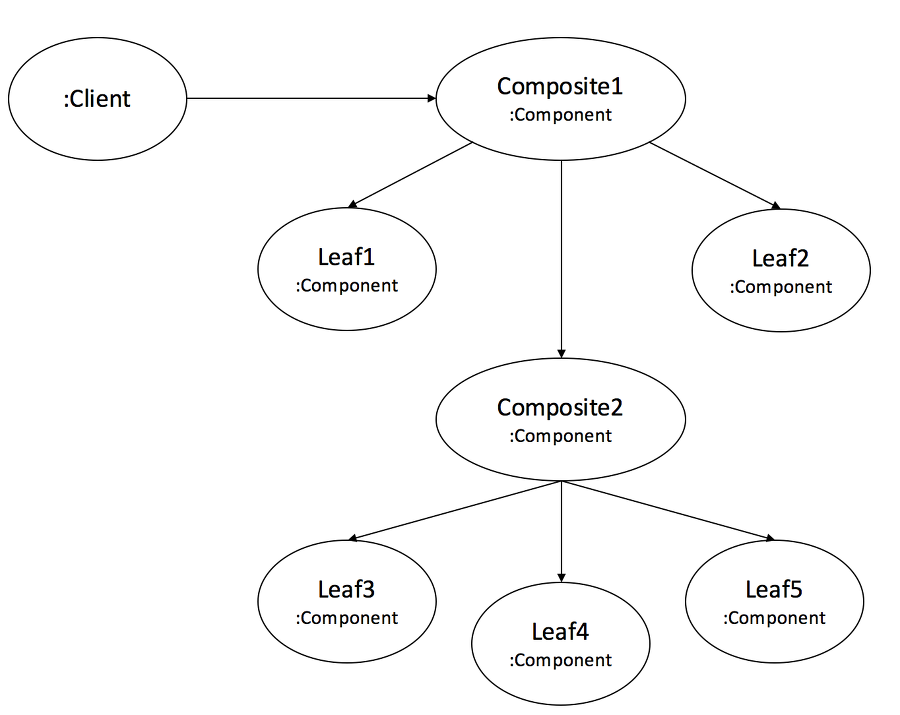

- 온라인 매장 예제 : 
  - 여러 상품을 그룹지어 패키지로 구매하면 할인을 해준다. 
  - 상품에는 개별 가격이 있는데 패키지 상품은 할인율을 감안하여 가격이 정해짐.
  - 전체 가격을 확인하려면, 하위 상품이 없을 때까지 계속 상품의 가격을 확인함.

In [68]:
from typing import Iterable, Union


class Product:
    def __init__(self, name, price):
        self._name = name
        self._price = price

    @property
    def price(self):
        return self._price


class ProductBundle:
    def __init__(
        self,
        name,
        perc_discount,
        *products: Iterable[Union[Product, "ProductBundle"]] ) -> None:
        # 여러 개의 타입이 허용될 수 있는 상황에서는 typing 모듈의 Union을 사용할 수 있음
        self._name = name
        self._perc_discount = perc_discount
        self._products = products

    @property
    def price(self):
        total = sum(p.price for p in self._products)
        return total * (1 - self._perc_discount)
    
if __name__ == "__main__":

        electronics = ProductBundle(
            "electronics",
            0,
            ProductBundle(
                "smartphones",
                0.5,
                Product("smartphone1", 400),
                Product("smartphone2", 600),
            ),
            ProductBundle(
                "laptops",
                0.1,
                Product("laptop1", 300),
                Product("laptop2", 700),
            ),
        )
        tablets = ProductBundle(
            "tablets", 0.1, Product("tablet1", 200), Product("tablet2", 300)
        )
        total = ProductBundle("total", 0, electronics, tablets)
        logger.info(total.price)
        
# 500 + 900 + 450 = 1850

INFO:test:1850.0


#### 2.3.3 데코레이터 
- 데코레이터 패턴을 사용하면 상속을 하지 않고도 객체의 기능을 동적으로 확장할 수 있음.
- 5장의 python decorator@와는 다름 주의!
- 다음 예제는 전달된 파라미터를 사용해서 쿼리에 사용할 수 있는 dictionary 형태의 객체를 반환하는 예제임.
- 동일한 인터페이스를 가지고 여러 단계를 거쳐 결과를 장식하거나, 결합도 할 수 있는 또 다른 객체를 만듬. <br>
    => 이렇게 새로운 기능을 추가하는 단계가 데코레이터 단계임.

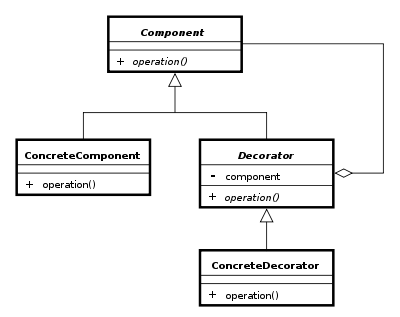

+ Component
    - ConcreteComponent 과 Decorator 가 구현할 인터페이스다.
    - 두 객체를 동등하게 다루기 위해 존재함
+ ConcreteComponent
    - Decorate 를 받을 객체다.
    - 즉, 기능 추가를 받을 기본 객체
+ Decorator
    - Decorate 를 할 객체의 추상 클래스다.
    - 즉, 기능 추가를 할 객체는 이 객체를 상속받는다.
+ ConcreteDecorator
    - Decorator 를 상속받아 구현할 다양한 기능 객체이다.
    - 이 기능들은 ConcreteComponent 에 추가되기 위해 만들어 진다.

In [71]:
class DictQuery:
    def __init__(self, **kwargs):
        self._raw_query = kwargs

    def render(self) -> dict: # 클라이언트에서는 render() method를 호출
        return self._raw_query

In [72]:
class QueryEnhancer:
    def __init__(self, query: DictQuery): 
        self.decorated = query

    def render(self):
        return self.decorated.render()


class RemoveEmpty(QueryEnhancer): #공통된 인터페이스 => 상호 교환가능
    def render(self):
        original = super().render()   # 오리지널을 받아서
        print("RemoveEmpty")
        return {k: v for k, v in original.items() if v} # 새로운 형식으로 리턴함


class CaseInsensitive(QueryEnhancer): #공통된 인터페이스 => 상호 교환가능
    def render(self):
        original = super().render()
        print("CaseInsensitive")
        return {k: v.lower() for k, v in original.items()}

In [73]:
original = DictQuery(foo="bar", empty="", none=None, upper="UPPERCASE", title="Title")
new_query = CaseInsensitive(RemoveEmpty(original))

In [74]:
new_query.render()

RemoveEmpty
CaseInsensitive


{'foo': 'bar', 'upper': 'uppercase', 'title': 'title'}

In [70]:
# 파이썬의 동적인 특성을 활용해 다른 방법으로 구현한 사례
from typing import Callable, Dict, Iterable

class QueryEnhancer:
    def __init__(
        self,
        query: DictQuery,
        *decorators: Iterable[Callable[[Dict[str, str]], Dict[str, str]]] # Callable[[input], return type]
    ) -> None:
        self._decorated = query
        self._decorators = decorators

    def render(self):
        current_result = self._decorated.render()
        for deco in self._decorators:
            current_result = deco(current_result)
        return current_result


def remove_empty(original: dict) -> dict:
    return {k: v for k, v in original.items() if v}


def case_insensitive(original: dict) -> dict:
    return {k: v.lower() for k, v in original.items()}

In [71]:
QueryEnhancer(original, remove_empty, case_insensitive).render()

{'foo': 'bar', 'upper': 'uppercase', 'title': 'title'}

#### 2.3.4 파사드(Facade)
- Facade는 "건물의 정면"을 의미하는 단어로 어떤 소프트웨어의 다른 커다란 코드 부분에 대하여 간략화된 인터페이스를 제공해주는 디자인 패턴을 의미함. 
- Facade 객체는 복잡한 소프트웨어 바깥쪽의 코드가 라이브러리의 안쪽 코드에 의존하는 일을 감소시켜 주고, 복잡한 소프트웨어를 사용 할 수 있게 간단한 인터페이스를 제공함.
- 사용자에게 노출해야 하는 임포트 가능한 외부용 레이아웃과 직접 임포트해서는 안되는 내부용 레이아웃을 구분해 설계할 수 있음.
- https://lktprogrammer.tistory.com/42

### 2.4 행동(Behavioral) 패턴
- 행동 패턴은 객체가 어떻게 협력해야하는지, 어떻게 통신하는지, 인터페이스는 어떤 형태여야 하는지에 대한 문제를 해결하는 것이 목표.
    1. 책임 연쇄 패턴
    2. 템플릿 메서드 패턴
    3. 커맨드 패턴
    4. 상태 패턴
   

#### 2.4.1 책임 연쇄 패턴
- 어떤 요청이 그 요청을 담당하는 객체에 들어오면, 각각의 요청에 대해서 특정한 객체가 담당하는 것이 일반적임. <br>
  하지만 객체를 연결리스트와 같은 사슬 방식으로 연결한 후에 요청을 수행하지 못하는 객체라면, 다음 객체에 넘기며 책임을 넘기는 형태의 패턴
  
- 후계자(Successor)라는 개념이 추가됨, 현재 이벤트를 처리할 수 없을 때 대비한 다음 이벤트 객체를 의미.
- 직접 처리가 가능한 경우 결과를 반환하지만 처리가 불가능하면 후계자(Successor)에게 전달하고 이 과정을 반복함
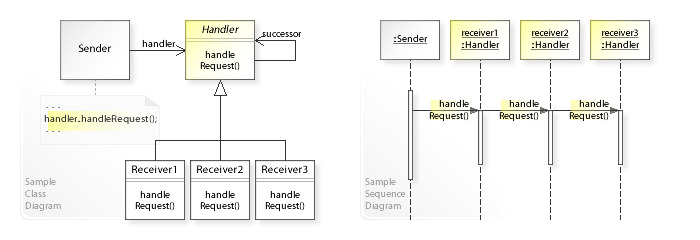

In [108]:
# 이벤트 로그 파싱 예제

import re

class Event:
    pattern = None

    def __init__(self, next_event=None):
        self.successor = next_event

    def process(self, logline: str):
        if self.can_process(logline):
            return self._process(logline)

        if self.successor is not None:
            return self.successor.process(logline)

    def _process(self, logline: str) -> dict:
        parsed_data = self._parse_data(logline)
        return {
            "type": self.__class__.__name__,
            "id": parsed_data["id"],
            "value": parsed_data["value"],
        }

    @classmethod
    def can_process(cls, logline: str) -> bool:
        return cls.pattern.match(logline) is not None

    @classmethod
    def _parse_data(cls, logline: str) -> dict:
        return cls.pattern.match(logline).groupdict()


class LoginEvent(Event):
    pattern = re.compile(r"(?P<id>\d+):\s+login\s+(?P<value>\S+)")
    

class LogoutEvent(Event):
    pattern = re.compile(r"(?P<id>\d+):\s+logout\s+(?P<value>\S+)")
    

# Login + Logout 이벤트 둘 다 처리 가능한 타입 추가 
class SessionEvent(Event):
    pattern = re.compile(r"(?P<id>\d+):\s+log(in|out)\s+(?P<value>\S+)")

[classmethod, cls 설명](https://firework-ham.tistory.com/101)

In [109]:
# login 이벤트 처리
chain = LogoutEvent(LoginEvent()) # 로그 아웃이 먼저 실행됨 -> LogoutEvent가 LoginEvent를 후계자로 받음.
print(chain.pattern)
chain.process("567: login User")  

re.compile('(?P<id>\\d+):\\s+logout\\s+(?P<value>\\S+)')


{'type': 'LoginEvent', 'id': '567', 'value': 'User'}

In [110]:
chain2 = SessionEvent(LogoutEvent(LoginEvent()))
print(chain2.pattern)
chain2.process("568: login User2") 

re.compile('(?P<id>\\d+):\\s+log(in|out)\\s+(?P<value>\\S+)')


{'type': 'SessionEvent', 'id': '568', 'value': 'User2'}

In [111]:
chain3 = LoginEvent(LogoutEvent(SessionEvent()))
print(chain3.pattern)
chain3.process("569: login User3") 

re.compile('(?P<id>\\d+):\\s+login\\s+(?P<value>\\S+)')


{'type': 'LoginEvent', 'id': '569', 'value': 'User3'}

#### 2.4.2 템플릿 메서드 패턴 
-  슈퍼 클래스에서 알고리즘에 대한 메소드의 뼈대(skeleton)만 작성하고, 서브 클래스에서 해당 메소드를 상속(inheritance)받아 구체적인 구현을 재정의(overriding) 하는 패턴.
- 템플릿 메소드 패턴은 소프트웨어 개발 원칙들 중 DRY(Don't repeat yourself)에 해당함.  <br>
  DRY는 어떠한 경우든 모든 형태의 데이터 중복을 지양하는 원리

https://www.coninggu.com/11

#### 2.4.3 커맨드 패턴
- 실행될 명령의 파라미터들을 저장하는 객체를 만듬.
- __ call()__  매직 메서드를 구현하여 호출 가능한 객체를 생성.
- 명령에 필요한 파라미터에 필터를 더하거나 제거하는 것처럼 상호작용할 수 잇는 메서드 제공
- 마지막으로 실제로 작업을 수행할 객체를 만듬
- 쿼리문 변경 예제가 있음

https://eomtttttt-develop.tistory.com/101

#### 2.4.4 상태 패턴
- 상태별로 작은 객체를 만들어 각각의 객체가 적은 책임을 갖게 하도록 구현
- Merge Request 예제 : 
  1. open 상태에서 closed 상태로 갈 때는 모든 approvals 제거
  2. MR이 방금 open된 상태라면 approvals 개수는 reopen인지에 상관없이 0개가 됨.
  3. MR이 merge될 때는 source branch를 삭제함.
- 이러한 모든 논리를 단일장소인 MergeRequest class에 넣으면 하나의 class가 너무 많은 책임을 갖게 되므로 적절치 않음. 

In [112]:
import abc

class InvalidTransitionError(Exception):
    """Raised when trying to move to a target state from an unreachable source state.
    """


class MergeRequestState(abc.ABC):
    def __init__(self, merge_request):
        self._merge_request = merge_request

    @abc.abstractmethod  # 추상 메서드로 지정
    def open(self):
        ...

    @abc.abstractmethod  # 추상 메서드로 지정
    def close(self):
        ...

    @abc.abstractmethod  # 추상 메서드로 지정
    def merge(self):
        ...

    def __str__(self):
        return self.__class__.__name__


class Open(MergeRequestState):
    def open(self):
        self._merge_request.approvals = 0

    def close(self):
        self._merge_request.approvals = 0
        self._merge_request.state = Closed # 상태를 전환하는 코드

    def merge(self):
        logger.info("merging %s", self._merge_request)
        logger.info("deleting branch %s", self._merge_request.source_branch)
        self._merge_request.state = Merged # 상태를 전환하는 코드


class Closed(MergeRequestState):
    def open(self):
        logger.info("reopening closed merge request %s", self._merge_request)
        self._merge_request.state = Open # 상태를 전환하는 코드

    def close(self):
        """Current state."""

    def merge(self):
        raise InvalidTransitionError("can't merge a closed request")


class Merged(MergeRequestState):
    def open(self):
        raise InvalidTransitionError("already merged request")

    def close(self):
        raise InvalidTransitionError("already merged request")

    def merge(self):
        """Current state."""


class MergeRequest:
    def __init__(self, source_branch: str, target_branch: str) -> None:
        self.source_branch = source_branch
        self.target_branch = target_branch
        self._state = None
        self.approvals = 0
        self.state = Open # 상태를 전환하는 코드

    @property
    def state(self):
        return self._state # 상태를 저장

    @state.setter
    def state(self, new_state_cls):
        print("calling setter", new_state_cls)
        self._state = new_state_cls(self)

    def open(self):
        return self.state.open()

    def close(self):
        return self.state.close()

    def merge(self):
        return self.state.merge()

    def __str__(self):
        return f"{self.target_branch}:{self.source_branch}"


In [124]:
mr = MergeRequest("develop", "master")
mr.open()
mr.approvals

calling setter <class '__main__.Open'>


0

In [125]:
mr.approvals = 3
mr.close()
mr.approvals

calling setter <class '__main__.Closed'>


0

In [126]:
mr.open()
mr.approvals

INFO:test:reopening closed merge request master:develop


calling setter <class '__main__.Open'>


0

In [127]:
mr.merge()

INFO:test:merging master:develop
INFO:test:deleting branch develop


calling setter <class '__main__.Merged'>


In [128]:
mr.close()

InvalidTransitionError: already merged request

# 3. Null 디자인 패턴
- 함수나 메서드는 일관된 타입을 반환해야 한다는 것
- 어떤 시스템을 사용하는 사용자를 나타내는 객체가 있다고 생각해보자, 사용자 ID를 바탕으로 검색 시 사용자가 없다면
    - 예외 발생
    - UserUnknow 타입을 반환
    - 어떤 경우에도 None을 반환하면 안됨
    - None이라는 문구는 방금 일어난 일에 대한 아무것도 설명해주지 않으며 호출자는 특별한 공지가 없으면 아무 생각없이 반환 객체에 대해 메서드를 호출할 것이므로 결국 AttributeError가 발생.
    - 차라리 비어있는 dictionary를 반환시켜라

# 디자인패턴 최종 정리

- 좋다, 나쁘다의 문제가 아니라 `어떻게` 구현하지? 에 대한 문제임.
<br>

- 어떤 경우에는 디자인패턴을 고려하는 것 보다 더 쉬운 솔루션이 있기 마련임.
<br>

- 패턴에 맞지 않는 곳에 패턴을 강요하면 오버 엔지니어링일 뿐.
<br>

- 3회 반복의 원칙, DRY 원칙 등 추상화를 위해 디자인 패턴을 적용하자!
<br>

- 무조건 패턴을 적용하려기 보다는 추상화를 통해 문제 상황을 인식하고 솔루션을 찾자. 
  (이미 검증되고 유효한 패턴이 적용됬다는 사실을 모른채 자연스럽게 개발을 했을 수도 있다.)
<br>

It suggests that design patterns aren’t things we invent. They’re things we discover.

참고 사이트
1. https://4z7l.github.io/2020/12/25/design_pattern_GoF.html
2. https://readystory.tistory.com/117
3. https://lktprogrammer.tistory.com/42
4. https://k0102575.github.io/articles/2020-02/chain-of-responsibility-pattern
5. https://www.coninggu.com/11
6. https://eomtttttt-develop.tistory.com/101
7. https://dailyheumsi.tistory.com/198
